# **STOCK MARKET CLUSTERING**

In [1]:
!pip install yfinance


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: C:\Users\gsome\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import pandas as pd

In [3]:
companies_dict = {
    'Adani Enterprises Limited':'ADANIENT.NS',
    'Infosys Limited':'INFY.NS',
    'ITC Limited':'ITC.NS',
    'Jindal Saw Limited':'JINDALSAW.NS',
    'Mahindra & Mahindra Financial Services Limited':'M&MFIN.NS',
    'Mahindra & Mahindra Limited':'M&M.NS',
    'Tata Motors Limited':'TATAMOTORS.NS',
    'Tata Steel Limited':'TATASTEEL.NS',
    'Jubilant FoodWorks Limited':'JUBLFOOD.NS',
    'Bharat Heavy Electricals Limited':'BHEL.NS',
    'National Fertilizers Limited':'NFL.NS',
    'State Bank of India':'SBIN.NS',
    'The Tata Power Company Limited':'TATAPOWER.NS',
    'V-Guard Industries Limited':'VGUARD.NS',
    'Punjab National Bank':'PNB.NS',
    'IDFC First Bank Limited':'IDFCFIRSTB.NS',
    'Bharat Petroleum Corporation Limited':'BPCL.NS',
    'Bajaj Finserv Ltd.':'BAJAJFINSV.NS',
    'Relaxo Footwears Limited':'RELAXO.NS',
    'ICICI Prudential Nifty 50 ETF':'ICICINIFTY.NS',
    'Coal India Limited':'COALINDIA.NS',
    'Delta Corp Limited':'DELTACORP.NS',
    'HDFC Bank Limited':'HDFCBANK.NS',
    'TCNS Clothing Co. Limited':'TCNSBRANDS.NS'}

In [4]:
start_date = '2019-04-25'
end_date = '2023-04-25'
df = yf.download(list(companies_dict.values()),start_date,end_date)

[*********************100%***********************]  24 of 24 completed


In [5]:
stock_open = np.array(df['Open']).T # stock_open is numpy array of transpose of df['Open']
stock_close = np.array(df['Close']).T # stock_close is numpy array of transpose of df['Close']

In [6]:
#‘movements’ is the difference of opening and closing prices of a particular day. Positive movement suggests to go long on stock(buy) and negative movement suggests to short the stock(sell).
movements = stock_close - stock_open

In [7]:
# for i in range(len(companies_dict)):
#  print('company:{}, Change:{}'.format(df['High'].columns[i],movements[i]))

We will consider Adani Enterprises and Infosys Limited

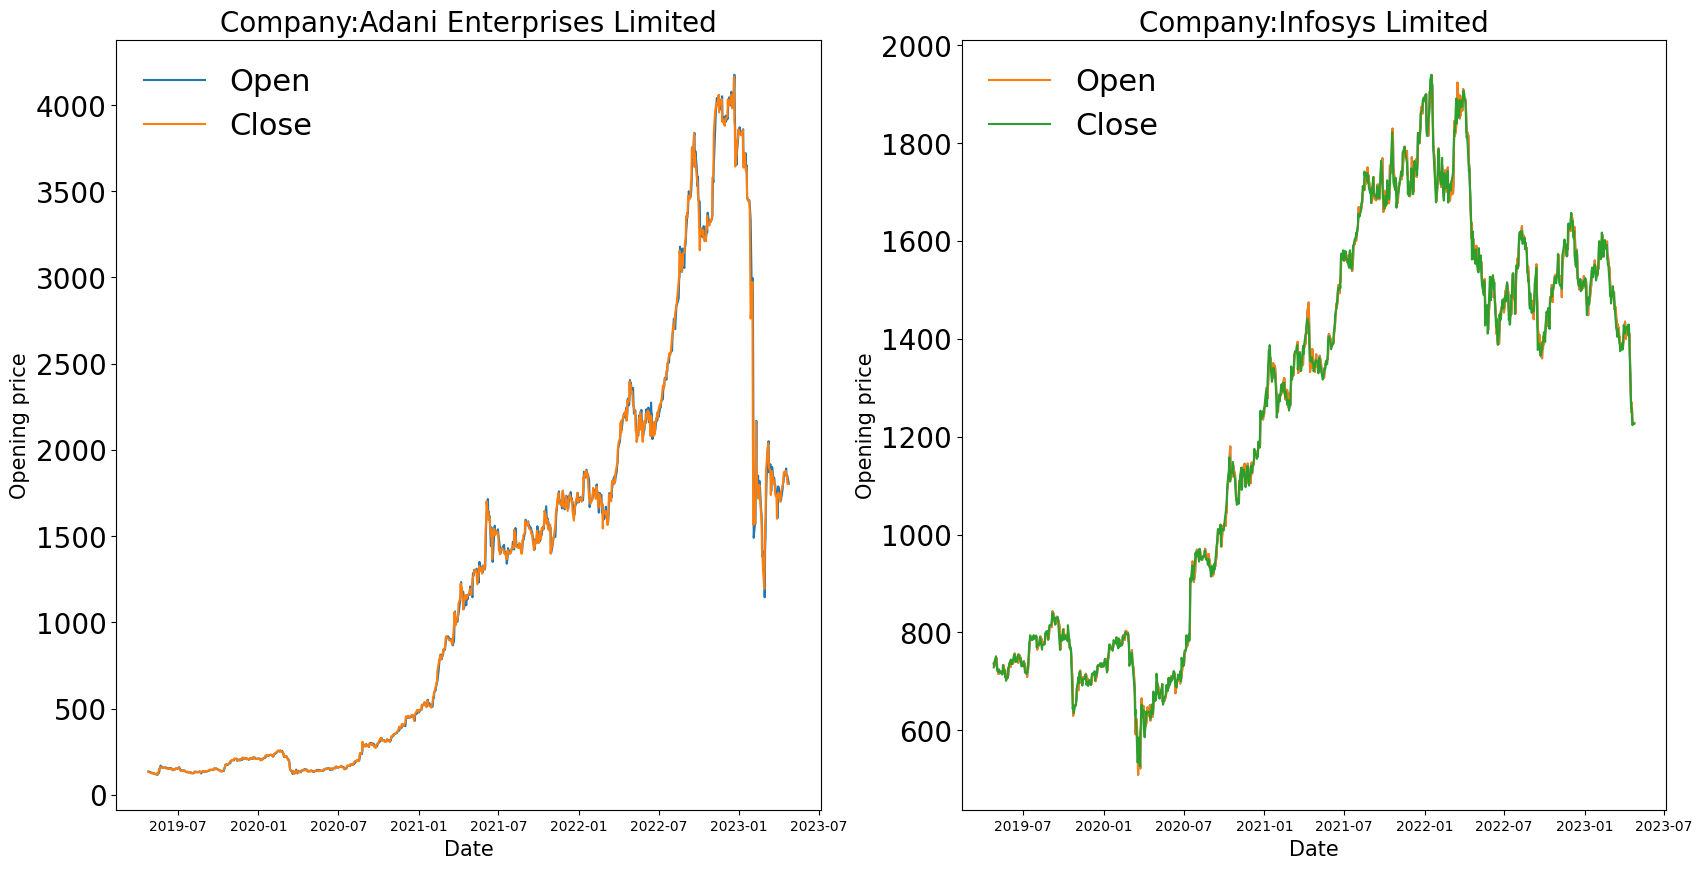

In [8]:
plt.figure(figsize = (20,10)) 

plt.subplot(1,2,1) 
plt.title('Company:Adani Enterprises Limited',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['ADANIENT.NS'],label='Open')
plt.plot(df['Close']['ADANIENT.NS'], label='Close')
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22})

plt.subplot(1,2,2) 
plt.title('Company:Infosys Limited',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['INFY.NS'])
plt.plot(df['Open']['INFY.NS'],label='Open')
plt.plot(df['Close']['INFY.NS'], label='Close')
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22})

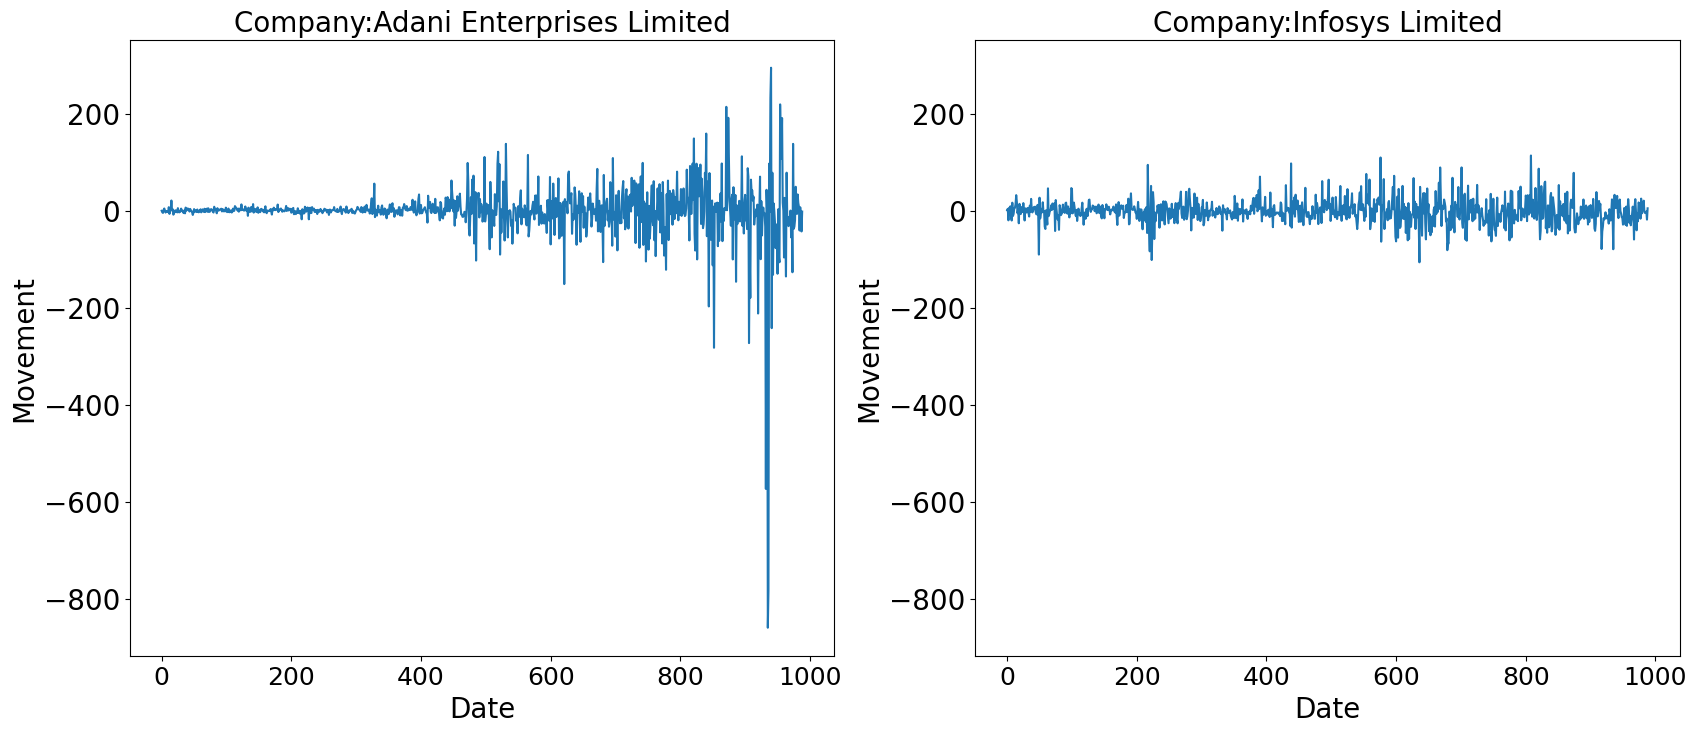

In [9]:
plt.figure(figsize = (20,8)) 
ax1 = plt.subplot(1,2,1)
plt.title('Company:Adani Enterprises Limited',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0]) 
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Infosys Limited',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[1])

Normalization of the values of each stock in the dataset

In [10]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(movements) # Fit and transform

In [11]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.4621904072225742
0.2605871027991976
-0.0028763794246930642


#### CREATING A PIPELINE

In [12]:
# Import the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
# Define a normalizer
normalizer = Normalizer()
# Create Kmeans model
kmeans = KMeans(n_clusters = 5,max_iter = 1000)
# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
predictions = pipeline.predict(movements)

C:\Users\gsome\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
df1 = pd.DataFrame({'Cluster':predictions,'companies':list(companies_dict)}).sort_values(by=['Cluster'],axis = 0)

In [14]:
df1

,Cluster,companies
1,0,Infosys Limited
6,0,Tata Motors Limited
22,0,HDFC Bank Limited
14,0,Punjab National Bank
2,1,ITC Limited
3,1,Jindal Saw Limited
18,1,Relaxo Footwears Limited
8,1,Jubilant FoodWorks Limited
16,1,Bharat Petroleum Corporation Limited
10,1,National Fertilizers Limited


### Dimension Reduction-Principal Component Analysis(PCA)

In [15]:
from sklearn.decomposition import PCA
# Define a normalizer
normalizer = Normalizer()
# Reduce the data
reduced_data = PCA(n_components = 2)
# Create Kmeans model
kmeans = KMeans(n_clusters = 5,max_iter = 1000)
# Make a pipeline chaining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer,reduced_data,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
# Prediction
predictions = pipeline.predict(movements)
# Create dataframe to store companies and predicted labels
df2 = pd.DataFrame({'labels':predictions,'companies':list(companies_dict.keys())}).sort_values(by=['labels'],axis = 0)

C:\Users\gsome\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Plot the Decision Boundary

<Figure size 640x480 with 0 Axes>

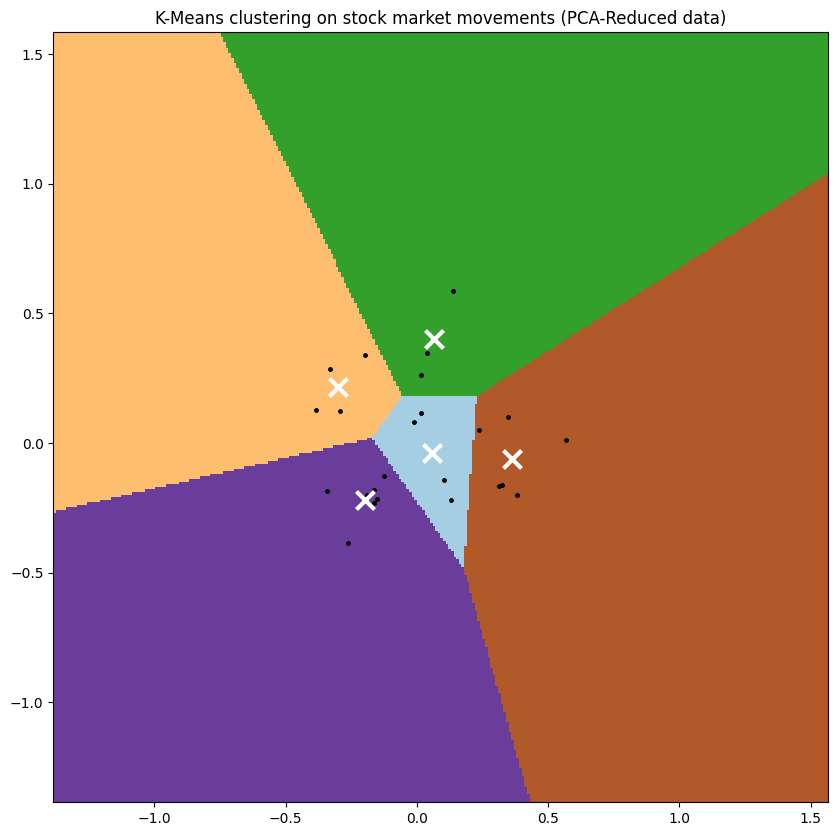

In [16]:
from sklearn.decomposition import PCA
# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_movements)
# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired
# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()